Picking this up significantly later, my original approach was to use the [Montreal Forced Aligner](https://montreal-forced-aligner.readthedocs.io/en/latest/) on the common voice dataset. This was then fed through `mwv/praat_formants_python` in order to create the csv datasets with auto-extracted formants f0, f1, f2 and f3 for both men and women (see `generated_dataset.py`). Let's plot these.

In [1]:
from common_voice.analyse_dataset import *

                                                                                                                                                                                       
male_data_by_phoneme = load_from_pkl_if_exists_else_csv(                                                                                                                                              
                                'common_voice/male_data_by_phoneme.pkl',                                                                                                                                               
                                'common_voice/male_data.csv')                                                                                                                                                          
                                                                                                                                                                                                          
female_data_by_phoneme = load_from_pkl_if_exists_else_csv(                                                                                                                                            
                                'common_voice/female_data_by_phoneme.pkl',                                                                                                                                             
                                'common_voice/female_data.csv')                                                                                                                                                                                                                                                                                                                                          

Loading from common_voice/male_data_by_phoneme.pkl
Loading from common_voice/female_data_by_phoneme.pkl


AW Female median F1:757.6745000000001 F2:1411.0385
AW Male median F1:634.216 F2:1237.904
AO Female median F1:612.968 F2:1085.889
AO Male median F1:552.521 F2:1010.6275
AY Female median F1:737.406 F2:1678.7035
AY Male median F1:614.302 F2:1560.0745000000002
UH Female median F1:479.213 F2:1406.51
UH Male median F1:413.848 F2:1279.962
IY Female median F1:401.243 F2:2387.657
IY Male median F1:337.142 F2:2127.242
AE Female median F1:743.698 F2:1807.7305000000001
AE Male median F1:624.672 F2:1641.873
UW Female median F1:404.591 F2:1699.354
UW Male median F1:352.22 F2:1568.406
OW Female median F1:546.196 F2:1284.151
OW Male median F1:477.2785 F2:1133.4365
OY Female median F1:517.691 F2:1452.5994999999998
OY Male median F1:483.154 F2:1332.38
EH Female median F1:617.579 F2:1878.7
EH Male median F1:521.23 F2:1679.864
ER Female median F1:526.0535 F2:1602.183
ER Male median F1:473.3425 F2:1465.5065
AA Female median F1:740.563 F2:1343.3470000000002
AA Male median F1:640.441 F2:1176.8015
IH Female m

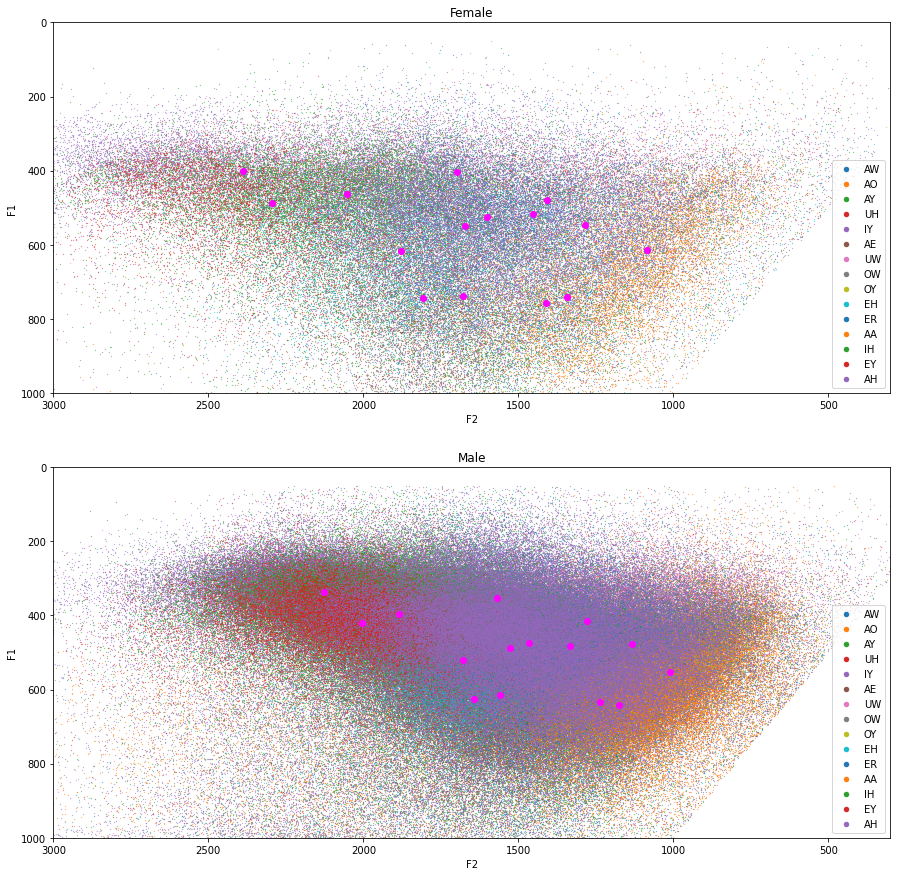

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

#cm = plt.get_cmap('gist_rainbow')
#NUM_COLOURS = len(female_data_by_phoneme.keys())

ax[0].set_title('Female')
ax[0].set_xlabel('F2')
ax[0].set_ylabel('F1')
ax[0].set_ylim(1000, 0)
ax[0].set_xlim(3000, 300)
#ax[0].set_prop_cycle('color', [cm(1.*i/NUM_COLOURS) for i in range(NUM_COLOURS)])


ax[1].set_title('Male')
ax[1].set_xlabel('F2')
ax[1].set_ylabel('F1')
ax[1].set_ylim(1000, 0)
ax[1].set_xlim(3000, 300)
#ax[1].set_prop_cycle('color', [cm(1.*i/NUM_COLOURS) for i in range(NUM_COLOURS)])


female_median = [[], []]
male_median = [[], []]

for phoneme, phoneme_data_female in female_data_by_phoneme.items():
    phoneme_data_male = male_data_by_phoneme[phoneme]

    female_f1 = extract_column('f1', phoneme_data_female)
    female_f2 = extract_column('f2', phoneme_data_female)

    male_f1 = extract_column('f1', phoneme_data_male)
    male_f2 = extract_column('f2', phoneme_data_male)

    ax[0].scatter(female_f2, female_f1, s=0.05, label=phoneme)
    ax[1].scatter(male_f2, male_f1, s=0.05, label=phoneme)

    female_median_f1 = np.median(female_f1)
    female_median_f2 = np.median(female_f2)
    print("{} Female median F1:{} F2:{}".format(phoneme, female_median_f1, female_median_f2))

    female_median[0].append(female_median_f1)
    female_median[1].append(female_median_f2)

    male_median_f1 = np.median(male_f1)
    male_median_f2 = np.median(male_f2)
    print("{} Male median F1:{} F2:{}".format(phoneme, male_median_f1, male_median_f2))

    male_median[0].append(male_median_f1)
    male_median[1].append(male_median_f2)


ax[0].scatter(female_median[1], female_median[0], c='magenta')
ax[1].scatter(male_median[1], male_median[0], c='magenta')

ax[0].legend(loc='best', markerscale=20)
ax[1].legend(loc='best', markerscale=20)
plt.show()


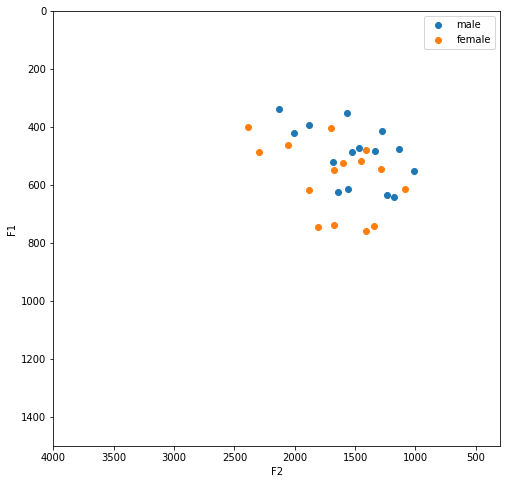

In [3]:
# Just plotting the median values

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlabel('F2')
ax.set_ylabel('F1')
ax.set_ylim(1500, 0)
ax.set_xlim(4000, 300)
ax.scatter(male_median[1], male_median[0], label='male')
ax.scatter(female_median[1], female_median[0], label='female')
ax.legend()
plt.show()

Judging by this, there does appear to be a difference in the F1 F2 values. At a glance it seems that for women the F2 formants are more laterally stretched compared to men. Need to do some sort of PCA to get the ellipsoid expected values.

Figured as well it's worth calculating pitch differences

MaleF0	Mean:145.92723290652924	Std:116.87756009118453	Lower:-204.70544736702436	Upper:496.55991318008284
FemaleF0	Mean:204.99332297121683	Std:81.89274181151531	Lower:-40.68490246332911	Upper:450.6715484057628
Male F0  Quantiles: [105.42219366 123.4826288  150.01483711]
Female F0 Quantiles: [168.00720333 197.09815479 226.62914818]


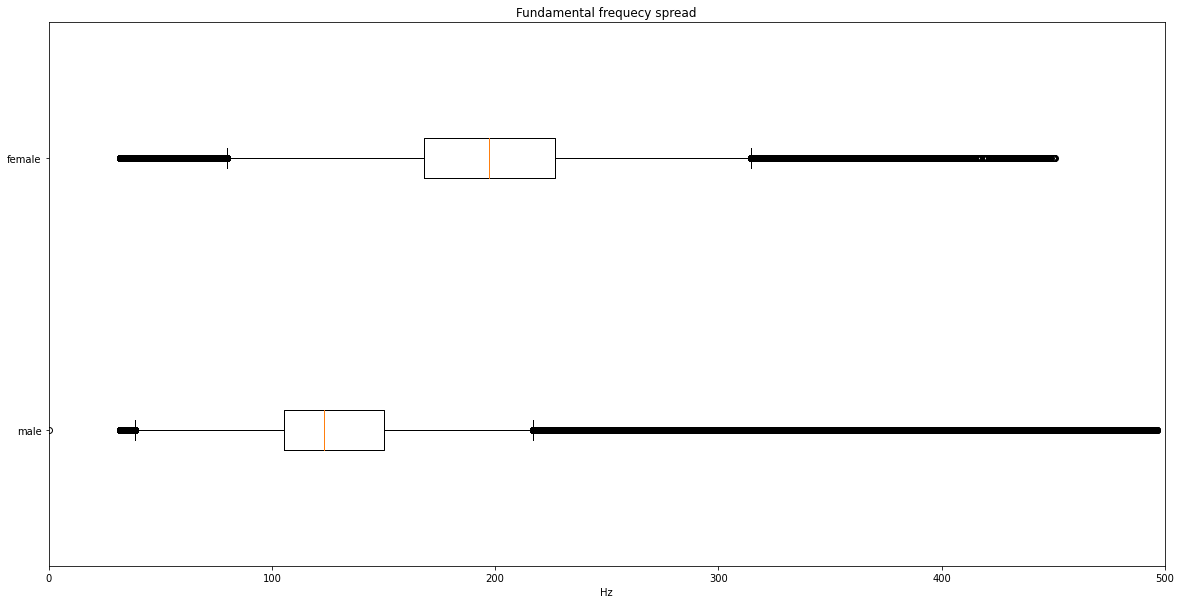

In [4]:
female_f0 = extract_columns_all_phonemes('f0', female_data_by_phoneme)
male_f0 = extract_columns_all_phonemes('f0', male_data_by_phoneme)

male_f0 = male_f0[~np.isnan(male_f0)]
female_f0 = female_f0[~np.isnan(female_f0)]

malef0_std = np.std(male_f0)
malef0_mean = np.mean(male_f0)
malef0_lower = malef0_mean - 3 * malef0_std 
malef0_upper = malef0_mean + 3 * malef0_std

print("MaleF0\tMean:{}\tStd:{}\tLower:{}\tUpper:{}".format(malef0_mean, 
                                                           malef0_std, 
                                                           malef0_lower, 
                                                           malef0_upper))

femalef0_std = np.std(female_f0)
femalef0_mean = np.mean(female_f0)
femalef0_lower = femalef0_mean - 3 * femalef0_std
femalef0_upper = femalef0_mean + 3 * femalef0_std 

print("FemaleF0\tMean:{}\tStd:{}\tLower:{}\tUpper:{}".format(femalef0_mean, 
                                                             femalef0_std, 
                                                             femalef0_lower, 
                                                             femalef0_upper))


male_f0_filtered = male_f0[np.where(np.all([male_f0 > malef0_lower, male_f0 < malef0_upper], axis=0))]
female_f0_filtered = female_f0[np.where(np.all([female_f0 > femalef0_lower, female_f0 < femalef0_upper], axis=0))]

male_quantiles = np.quantile(male_f0_filtered, [0.25, 0.5, 0.75])
female_quantiles = np.quantile(female_f0_filtered, [0.25, 0.5, 0.75])

print("Male F0  Quantiles: {}".format(male_quantiles))
print("Female F0 Quantiles: {}".format(female_quantiles))

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([male_f0_filtered, female_f0_filtered], vert=False)
ax.set_yticklabels(['male','female'])
ax.set_xlabel('Hz')
ax.set_xlim(0,500)
ax.set_title("Fundamental frequecy spread")
plt.show()

We should be able to create a model comprised of regions based on the standard deviation of F1 and F2. However all the formants are codependent. Actually one sec

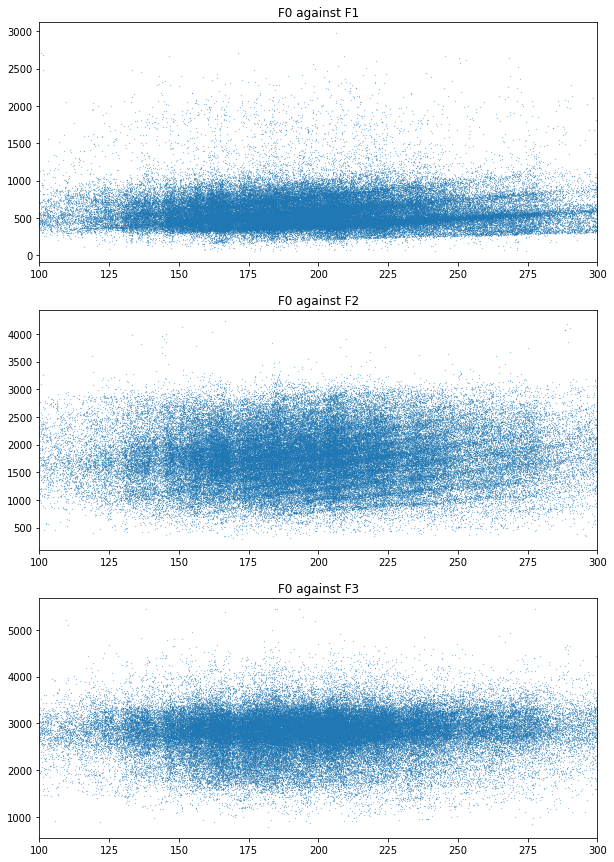

In [5]:
female_f0 = extract_columns_all_phonemes('f0', female_data_by_phoneme)
female_f1 = extract_columns_all_phonemes('f1', female_data_by_phoneme)
female_f2 = extract_columns_all_phonemes('f2', female_data_by_phoneme)
female_f3 = extract_columns_all_phonemes('f3', female_data_by_phoneme)
#female_f4 = extract_column('f4', phoneme_data_female)


fig, ax = plt.subplots(3, 1, figsize=(10,15))
ax[0].scatter(female_f0, female_f1, s=0.03)
ax[0].set_xlim(100, 300)
ax[0].set_title('F0 against F1')

ax[1].scatter(female_f0, female_f2, s=0.03)
ax[1].set_xlim(100, 300)
ax[1].set_title('F0 against F2')

ax[2].scatter(female_f0, female_f3, s=0.03)
ax[2].set_xlim(100, 300)
ax[2].set_title('F0 against F3')

plt.show()

Ok cool, F0 and the higher formants are not seemingly correlated. This is slightly surprising as F3 is supposedly an idicator of the length of the vocal tract of the speaker (according to [this link](https://www.reddit.com/r/linguistics/comments/azgyaw/what_do_formants_f1_f2_f3_f4_actually_correspond/) that is) and one would expect a positive correlation with F0, however in the data this appears to not be the case.

Anyway, there's obviously correlation between F1 and F2, i.e. they do not always produce axis-aligned regions. For example:

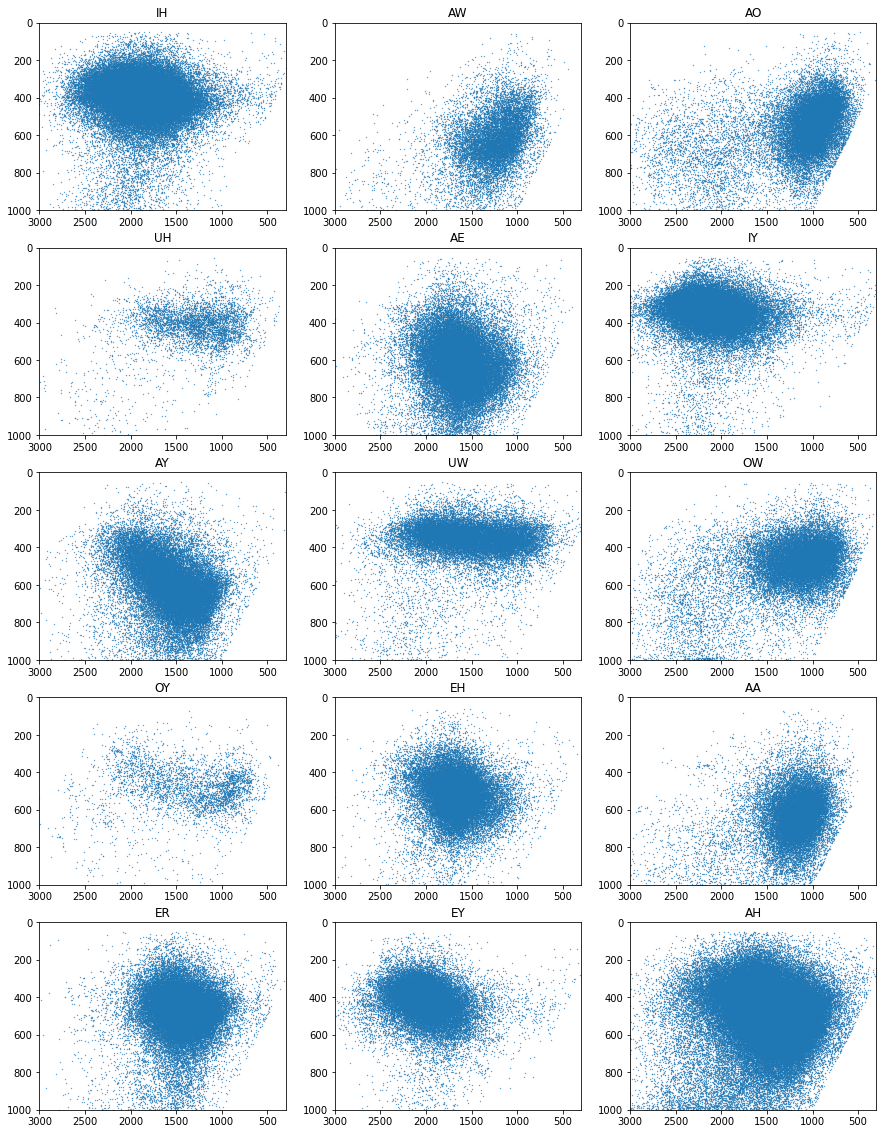

In [6]:
fig, ax = plt.subplots(5,3, figsize=(15,20))

ax = ax.reshape(-1)

for i, (phoneme, phoneme_data) in enumerate(male_data_by_phoneme.items()):
    f1 = extract_column('f1', phoneme_data)
    f2 = extract_column('f2', phoneme_data)
    
    ax[i].scatter(f2, f1, s=0.1)
    ax[i].set_ylim(1000, 0)
    ax[i].set_xlim(3000, 300)
    ax[i].set_title(phoneme)
    

Looking at these plots it's clear there is some obvious overlap between phonemes. This is partly because of a weakness of the there are dipthongs (AW, AY, EY, OW, OY). However both AW and OW for example transition to the IPA phoneme ʊ so we should seem so overlapping regions. Indeed we do in the top right where we would expect to find that vowel, which is encouraging. AY, EY and OY all transition to the phoneme ɪ and indeed these do all have areas of overlap in the top left of the plot where we would expect to 
![img](formant_analysis/VChart/VChart/FormantPlot.jpg)

| ARPABet | IPA | example (american accent) | 
|:-------:|:---:|:-------------------------:|
| AA 	  | ɑ   | b**al**m                  |
| AE 	  | æ   | b**a**t                   |
| AH 	  | ʌ 	| b**u**tt                  |
| AO      | ɔ   | st**o**ry                 |	
| AW      | aʊ  | b**ou**t                  |
| AY      | aɪ  | b**i**te                  |
| EH      | ɛ   | b**e**t                   |
| ER      | ɝ   | b**ir**d                  |
| EY      | eɪ  | b**ai**t                  |
| IH      | ɪ   | b**i**t                   |
| IY      | i   | b**ea**t                  |
| OW      | oʊ  | b**oa**t                  |
| OY      | ɔɪ  | b**oy**                   |
| UH      | ʊ   | b**oo**k                  |
| UW      | u(ʉ,y)| b**oo**t                  |


Furthermore there is some overlap. Looking in the pronuncation dictrionary (`montreal_forced_aligner/lexicon2.txt`) the arpanet phoneme appears to be used AH to represent both ə and ʌ which admittedly are both mid vowels but it is likely why it overlaps the whole space. We may need to be more discerning with our data. The ə (schwa) sound can be used in colloquial english to replace almost any vowel anyway.

Given the wide variety of english accents, direct vowel classification for any model might be folly. While some words have dipthongs in some accents, they don't have dipthongs in others whereas they may be tripthongs in others still. It may be valuable to attempt to cluster common regions and isolate unique regions so we only ever deal with more or less distinct singular phonemes.

Secondly we shouldn't take the auto alignment and formant extraction as wrote. This is all automated after all. It may still be worth considering the [Penn Phonetics Lab Aligner](https://web.sas.upenn.edu/phonetics-lab/facilities/)

Maybe we can make some more sense of this if we draw ovoids. We can't just The distribution is not axis-aligned so I think what we need to do is apply PCA to transform the data and determine the spread of the ovoid based on the transformed data.

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

components: [[ 0.96635621  0.25720746]
 [-0.25720746  0.96635621]]
explained variance: [128094.04201464  21916.71500509]


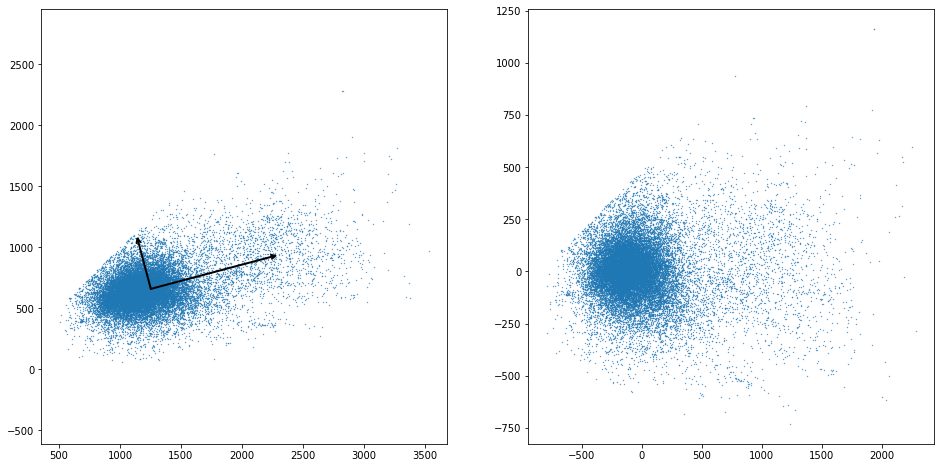

In [8]:
from sklearn.decomposition import PCA

AA_data = male_data_by_phoneme['AA']
AA_F1 = extract_column('f1', AA_data)
AA_F2 = extract_column('f2', AA_data)
AA_formants = np.array([[*AA_F2], [*AA_F1]]).T

pca = PCA(n_components=2)
pca.fit(AA_formants)

print("components: {}".format(pca.components_))
print("explained variance: {}".format(pca.explained_variance_))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(AA_formants[:,0], AA_formants[:, 1], s=0.1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');

AA_formants_pca = pca.transform(AA_formants)
ax[1].scatter(AA_formants_pca[:,0], AA_formants_pca[:, 1], s=0.1)


plt.show()

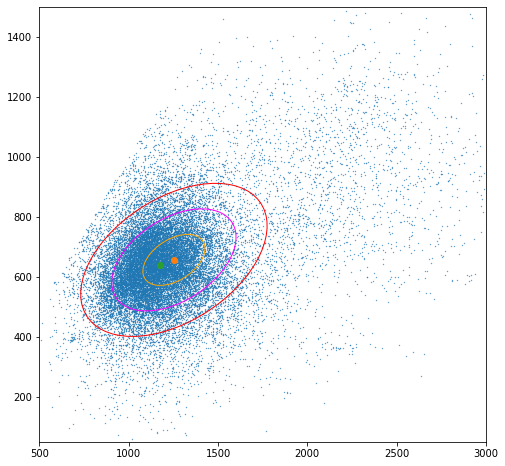

In [9]:
from matplotlib.patches import Ellipse
# if I've understood correctly we can treat sqrt(variance) from pca explained variance as a standard deviation
# lets try plotting some ellipses

# general ellipse formula 
# 1/(a^2)*((x - c_x)cos(A) + (y - c_y)sin(A))^2 + 1/(b^2)*((x - c_x)sin(A) - (y - c_y)cos(A))^2 = 1

pca_component = np.array(pca.components_[0])
axis = np.array([1,0])
angle = np.arccos(pca_component.dot(axis))*(180/np.pi)

def confidence_ellipse(centre, variance, deviations, angle, colour):
    return Ellipse(centre, 
                   width=np.sqrt(variance[0]) * deviations,
                   height=np.sqrt(variance[1]) * deviations,
                   angle=angle,
                   edgecolor=colour,
                   facecolor='none')



fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(AA_formants[:,0], AA_formants[:, 1], s=0.1)
ax.set_xlim(500,3000)
ax.set_ylim(50, 1500)
ax.scatter([pca.mean_[0]], [pca.mean_[1]])
ax.scatter(*np.median(AA_formants, axis=0))
ax.add_patch(confidence_ellipse(pca.mean_, pca.explained_variance_, 1, angle, 'orange'))
ax.add_patch(confidence_ellipse(pca.mean_, pca.explained_variance_, 2, angle, 'magenta'))
ax.add_patch(confidence_ellipse(pca.mean_, pca.explained_variance_, 3, angle, 'red'))

plt.show()

A 95% (2std) ellipsoid seems to fit rather nicely in terms of size but the data is rather noisy. Using a mean and standard deviations to clean it up will skew tha result I suspect.

Let's try using DBSCAN to do clustering and filter the outliers

Found clusters: 2
largest cluster 0 : 18333


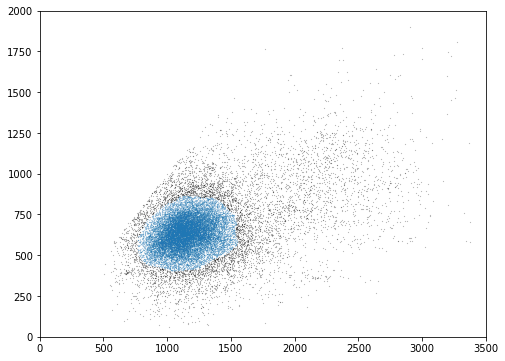

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(AA_formants)
clustering = DBSCAN(eps=0.2, min_samples=(len(AA_formants)/100), n_jobs=-1).fit(X)
print("Found clusters: {}".format(len(set(clustering.labels_))))

largest_cluster = []
largest_cluster_label = None

for label in set(clustering.labels_):
    if label == -1:
        continue
    cluster = AA_formants[clustering.labels_ == label]
    if len(cluster) > len(largest_cluster):
        largest_cluster = cluster
        largest_cluster_label = label

print("largest cluster {} : {}".format(largest_cluster_label, len(largest_cluster)))


plt.figure(figsize=(8,6))
plt.scatter(largest_cluster[:,0], largest_cluster[:,1], s=0.01)
plt.xlim(0,3500)
plt.ylim(0,2000)
outliers = AA_formants[(clustering.labels_ != largest_cluster_label)]
plt.scatter(outliers[:,0], outliers[:,1], s=0.01, c='black')


plt.show()


This clustering seems to work quite well with an eps set to 0.2 and a minimum cluster size of 1% of the data

Might be tricky for the dipthong phonemes however as the representation isn't explicitly Gaussian. One would hope for two clusters to be found, the beginning and the end of the dipthong.

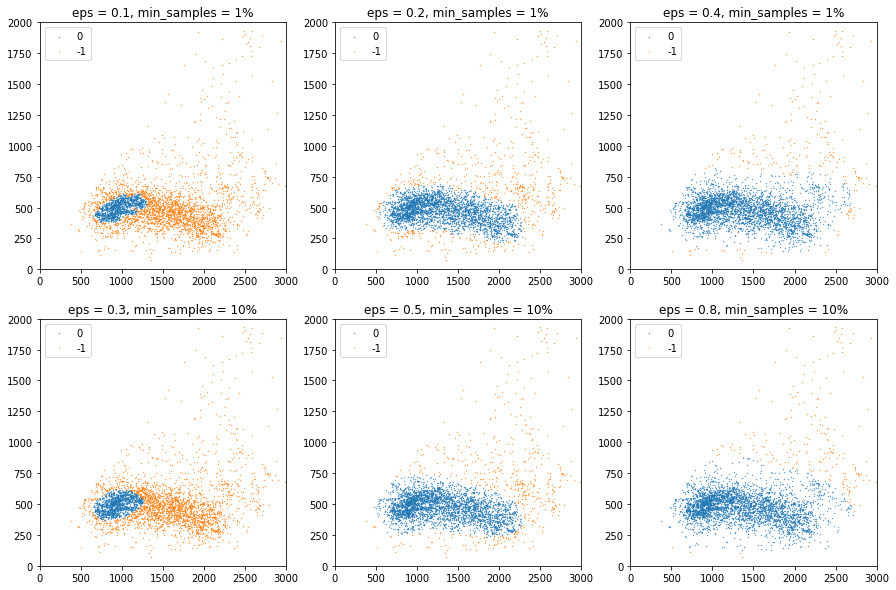

In [11]:
OY_data = male_data_by_phoneme['OY']
OY_F1 = extract_column('f1', OY_data)
OY_F2 = extract_column('f2', OY_data)
OY_formants = np.array([[*OY_F2], [*OY_F1]]).T

fig, axes = plt.subplots(2, 3, figsize=(15,10))

for ax, eps, min_percent in zip(axes.reshape(-1), [0.1, 0.2, 0.4, 0.3, 0.5, 0.8], [1,1,1, 10, 10, 10]):
    X = StandardScaler().fit_transform(OY_formants)
    clustering = DBSCAN(eps=eps, min_samples=min_percent*len(OY_formants)/100, n_jobs=-1).fit(X)

    for label in set(clustering.labels_):
        cluster = OY_formants[clustering.labels_ == label]
        ax.scatter(cluster[:,0], cluster[:,1], s=0.1, label=label)
    
    ax.set_title("eps = {}, min_samples = {}%".format(eps, min_percent))
    ax.set_xlim(0, 3000)
    ax.set_ylim(0, 2000)
    ax.legend()
    

plt.show()

Alas, only seems to get one cluster. However, DBScan does seem to do a very good job of filtering out the noise. From visual inspection it would seem that the "real" data points lie in that slightly curved sausage shape, and it seems that an eps of 0.5 with a min sample size of 10%, this non-gaussing shape is extracted.

Out of curiousity, what does this look like if we apply this clustering to all the formant data?

eps: 0.02, min_samples: 10, Found 278 clusters
eps: 0.05, min_samples: 29, Found 9 clusters
eps: 0.2, min_samples: 290, Found 2 clusters


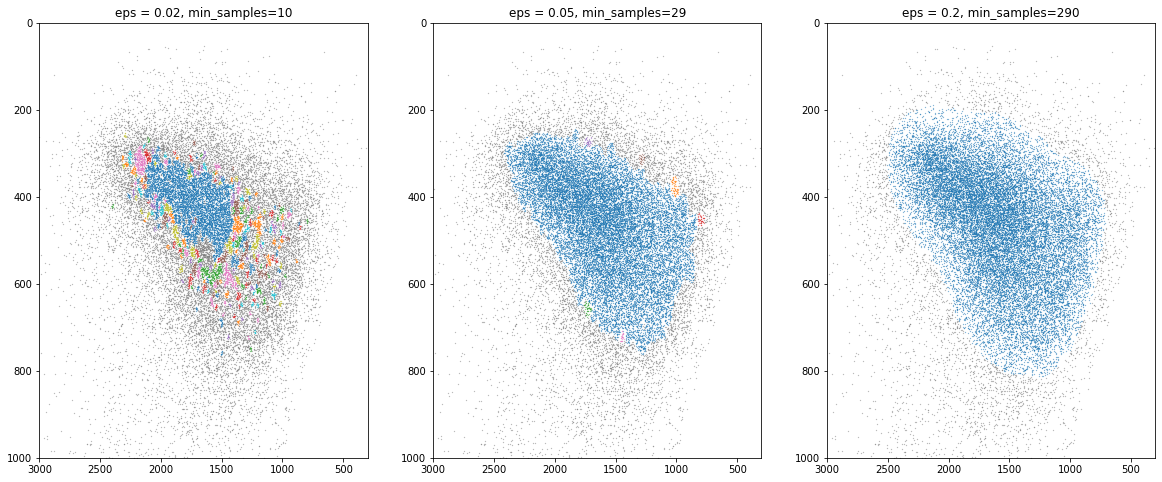

In [100]:
male_f1 = extract_columns_all_phonemes('f1', male_data_by_phoneme)
male_f2 = extract_columns_all_phonemes('f2', male_data_by_phoneme)

male_formants = np.array([[*male_f2], [*male_f1]]).T
# kernel dies running this with all the data, take a 20% sample
male_sample = male_formants[np.random.choice(len(male_formants), int(len(male_formants)/20))]

X = StandardScaler().fit_transform(male_sample)

fig, axes = plt.subplots(1, 3, figsize=(20,8))

for eps, samples, ax in zip([0.02, 0.05, 0.2], [10, int(0.1*len(X)/100), int(len(X)/100)], axes.reshape(-1)): 
    clustering = DBSCAN(eps=eps, min_samples=samples, n_jobs=-1).fit(X)
    print("eps: {}, min_samples: {}, Found {} clusters".format(eps, samples, len(set(clustering.labels_))))

    for label in set(clustering.labels_):
        cluster = male_sample[clustering.labels_ == label]
        if label == -1:
            ax.scatter(cluster[:,0], cluster[:,1], s=0.05, c='gray')
        else:
            ax.scatter(cluster[:,0], cluster[:,1], s=0.05)
        
    ax.set_title("eps = {}, min_samples={}".format(eps, samples))
    ax.set_ylim(1000, 0)
    ax.set_xlim(3000, 300)


plt.show()

That's kind of what I expected. The data doesn't have any obvious clusters, at least nothing we can fit a nice model to. However the eps=0.2 1% sample setting works pretty well for outlier filtering here. Indeed because the space is continuous, any clusters it finds will be more due to commonality of that vowel.

However maybe using DBSCAN to filter the data and then applying something like K-means specifying the number of expected vowels (say ~20 to correspond to the expected number of vowels in English) and see what clusters are found then.

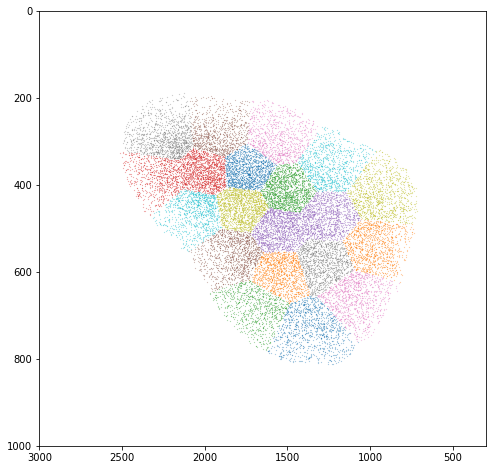

In [104]:
from sklearn.cluster import KMeans, SpectralClustering

clustering = DBSCAN(eps=0.2, min_samples=len(X)/100, n_jobs=-1).fit(X)

male_filtered = male_sample[clustering.labels_ != -1]

X_filtered = StandardScaler().fit_transform(male_filtered)
k_means = KMeans(n_clusters=20).fit(X_filtered)

fig, ax = plt.subplots(figsize=(8,8))

for label in set(k_means.labels_):
    cluster = male_filtered[k_means.labels_ == label]
    ax.scatter(cluster[:,0], cluster[:,1], s=0.02)
ax.set_ylim(1000, 0)
ax.set_xlim(3000, 300)

    
plt.show()



Kinda neat. I wonder if this could be used to create auto-extracted phonemes? 


Thing that has been bothering me though is that there's a reasonable amount of overlap between the two formant regions. The thing is, I don't want to be in a position where I'm having to do vowel classification as that starts adding complexity and making things language (and even potentially accent) specific. Lets plot the total formant plots after cleaning them up.

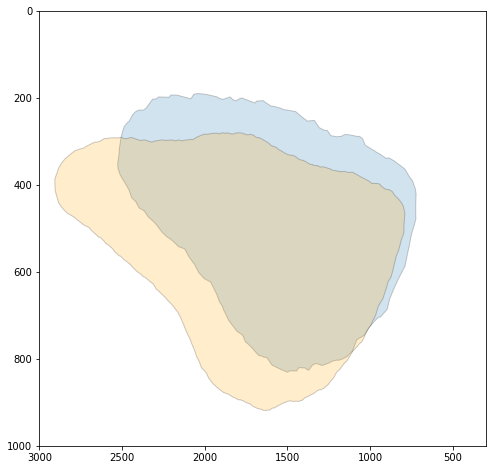

In [121]:
import alphashape
from descartes import PolygonPatch

male_f1 = extract_columns_all_phonemes('f1', male_data_by_phoneme)
male_f2 = extract_columns_all_phonemes('f2', male_data_by_phoneme)

male_formants = np.array([[*male_f2], [*male_f1]]).T
male_formants = male_formants[np.random.choice(len(male_formants), int(len(male_formants)/20))]

female_f1 = extract_columns_all_phonemes('f1', female_data_by_phoneme)
female_f2 = extract_columns_all_phonemes('f2', female_data_by_phoneme)

female_formants = np.array([[*female_f2], [*female_f1]]).T

Xm = StandardScaler().fit_transform(male_formants)
Xf = StandardScaler().fit_transform(female_formants)
dbscan_m = DBSCAN(eps=0.2, min_samples=len(Xm)/100, n_jobs=-1).fit(Xm)
dbscan_f = DBSCAN(eps=0.2, min_samples=len(Xf)/100, n_jobs=-1).fit(Xf)

male_filtered = male_formants[dbscan_m.labels_ != -1]
female_filtered = female_formants[dbscan_f.labels_ != -1]

alphashape_male = alphashape.alphashape(male_filtered, 0.02)
alphashape_female = alphashape.alphashape(female_filtered, 0.02)

fig, ax = plt.subplots(figsize=(8,8))
#ax.scatter(male_filtered[:,0], male_filtered[:,1], s=0.02)
ax.add_patch(PolygonPatch(alphashape_male, alpha=0.2))
ax.add_patch(PolygonPatch(alphashape_female, alpha=0.2, fc='orange'))

ax.set_ylim(1000, 0)
ax.set_xlim(3000, 300)

plt.show()


So here the female formant region is in orange and the male formant region is in blue. It would seem there's actually quite a bit of overlap. However there's also some specific regions that are exclusive. It'd be interesting to hear how these overlapping regions compare. In these regions, is pitch the predominant factor?

Need to be able to separate out this region and manually inspect.